In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_per = pd.read_csv('Clean Data/PerformanceMeasure.csv')
df_well = pd.read_csv('Clean Data/WellnessMeasure.csv')
df_rpe = pd.read_csv('Clean Data/rpe_final.csv')

In [12]:
from datetime import datetime, timedelta

fmt = '%Y-%m-%d'
df_per["train_date"]  = (pd.to_datetime(df_per["Date"], format=fmt) - pd.Timedelta('1 days')).dt.strftime(date_format=fmt)
df_per.head()

,GameID,Date,PlayerID,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff,train_date
0,1,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,19,2017-11-29
1,2,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,31,2017-11-29
2,3,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,17,2017-11-29
3,1,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,19,2017-11-29
4,2,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,31,2017-11-29


In [13]:
df = pd.merge(df_rpe, df_per,  how='left',left_on=['Date','PlayerID'],right_on=["train_date",'PlayerID'])
df = df.dropna()
df.head()

,Unnamed: 0,Date_x,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,AcuteChronicRatio,GameID,Date_y,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff,train_date
2690,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,0.50,1.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,19.0,2017-11-29
2691,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,0.50,2.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,31.0,2017-11-29
2692,2690,2017-11-29,2,Skills,90.0,4.0,360.0,360.0,181.4,0.50,3.0,2017-11-30,0.524367,0.264378,0.754193,51.431257,W,17.0,2017-11-29
2693,2691,2017-11-29,3,Skills,60.0,6.0,360.0,360.0,239.3,0.52,1.0,2017-11-30,0.452520,0.333518,0.753256,51.309794,W,19.0,2017-11-29
2694,2691,2017-11-29,3,Skills,60.0,6.0,360.0,360.0,239.3,0.52,2.0,2017-11-30,0.452520,0.333518,0.753256,51.309794,W,31.0,2017-11-29


In [14]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(["Date_x"], axis=1)
df.rename(columns = {'Date_y':'Date'}, inplace = True)
df.shape

(570, 17)

In [16]:
df_final = pd.merge(df,df_well,how='left',left_on = ["Date","PlayerID"],right_on = ["Date","PlayerID"])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 23 columns):
PlayerID               570 non-null int64
SessionType            570 non-null object
Duration               570 non-null float64
RPE                    570 non-null float64
SessionLoad            570 non-null float64
DailyLoad              570 non-null float64
AcuteLoad              570 non-null float64
AcuteChronicRatio      570 non-null float64
GameID                 570 non-null float64
Date                   570 non-null object
AccelImpulse           570 non-null float64
AccelLoad              570 non-null float64
Speed                  570 non-null float64
PerformanceScore       570 non-null float64
Outcome                570 non-null object
PointsDiff             570 non-null float64
train_date             570 non-null object
Pain                   561 non-null object
Illness                561 non-null object
Menstruation           561 non-null object
Nutrition              5

In [17]:
df_final = df_final.dropna()
df_final

,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,AcuteChronicRatio,GameID,Date,...,PerformanceScore,Outcome,PointsDiff,train_date,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,EWMScore
0,2,Skills,90.0,4.0,360.0,360.0,181.4,0.50,1.0,2017-11-30,...,51.431257,W,19.0,2017-11-29,No,No,No,Excellent,Yes,27.190845
1,2,Skills,90.0,4.0,360.0,360.0,181.4,0.50,2.0,2017-11-30,...,51.431257,W,31.0,2017-11-29,No,No,No,Excellent,Yes,27.190845
2,2,Skills,90.0,4.0,360.0,360.0,181.4,0.50,3.0,2017-11-30,...,51.431257,W,17.0,2017-11-29,No,No,No,Excellent,Yes,27.190845
3,3,Skills,60.0,6.0,360.0,360.0,239.3,0.52,1.0,2017-11-30,...,51.309794,W,19.0,2017-11-29,No,No,No,Excellent,Yes,29.998792
4,3,Skills,60.0,6.0,360.0,360.0,239.3,0.52,2.0,2017-11-30,...,51.309794,W,31.0,2017-11-29,No,No,No,Excellent,Yes,29.998792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,11,Mobility/Recovery,15.0,2.0,30.0,534.0,256.3,0.74,38.0,2018-07-21,...,48.221864,W,12.0,2018-07-20,No,Slightly Off,No,Excellent,Yes,29.285519
566,13,Game,25.5,6.0,153.0,306.0,259.4,0.90,37.0,2018-07-21,...,50.137139,L,-12.0,2018-07-20,No,No,No,Excellent,Yes,30.128607
567,13,Game,25.5,6.0,153.0,306.0,259.4,0.90,38.0,2018-07-21,...,50.137139,W,12.0,2018-07-20,No,No,No,Excellent,Yes,30.128607
568,13,Mobility/Recovery,10.0,0.0,0.0,306.0,259.4,0.90,37.0,2018-07-21,...,50.137139,L,-12.0,2018-07-20,No,No,No,Excellent,Yes,30.128607


In [18]:
df_final = df_final.drop(["GameID","Outcome","PointsDiff"], axis=1)
df_final = df_final.drop_duplicates()
df_final

,PlayerID,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,AcuteChronicRatio,Date,AccelImpulse,AccelLoad,Speed,PerformanceScore,train_date,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,EWMScore
0,2,Skills,90.0,4.0,360.0,360.0,181.4,0.50,2017-11-30,0.524367,0.264378,0.754193,51.431257,2017-11-29,No,No,No,Excellent,Yes,27.190845
3,3,Skills,60.0,6.0,360.0,360.0,239.3,0.52,2017-11-30,0.452520,0.333518,0.753256,51.309794,2017-11-29,No,No,No,Excellent,Yes,29.998792
6,6,Skills,60.0,4.0,240.0,240.0,192.9,0.48,2017-11-30,0.582358,0.285724,0.659945,50.934243,2017-11-29,No,No,No,Excellent,Yes,28.573330
9,7,Skills,75.0,5.0,375.0,375.0,156.4,0.32,2017-11-30,0.673267,0.189919,0.549412,47.086623,2017-11-29,No,No,No,Excellent,Yes,29.155719
12,8,Skills,60.0,4.0,240.0,240.0,137.1,0.29,2017-11-30,0.499550,0.344518,0.759574,53.454748,2017-11-29,No,No,No,Excellent,Yes,31.962006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,16,Skills,60.0,4.0,240.0,240.0,102.9,0.30,2018-07-20,0.585509,0.213284,0.643667,48.081997,2018-07-19,No,No,No,Excellent,Yes,27.608151
562,11,Game,36.0,7.0,252.0,534.0,256.3,0.74,2018-07-21,0.353555,0.308181,0.784919,48.221864,2018-07-20,No,Slightly Off,No,Excellent,Yes,29.285519
564,11,Mobility/Recovery,15.0,2.0,30.0,534.0,256.3,0.74,2018-07-21,0.353555,0.308181,0.784919,48.221864,2018-07-20,No,Slightly Off,No,Excellent,Yes,29.285519
566,13,Game,25.5,6.0,153.0,306.0,259.4,0.90,2018-07-21,0.492349,0.331446,0.680319,50.137139,2018-07-20,No,No,No,Excellent,Yes,30.128607


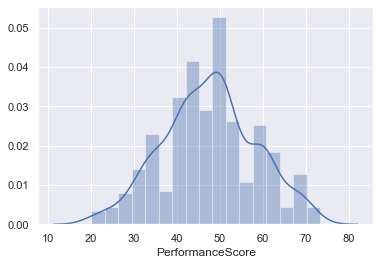

In [19]:
import seaborn as sns; sns.set()
sns.distplot(df_final.PerformanceScore)
plt.show()

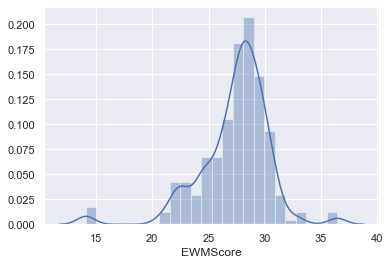

In [21]:
sns.distplot(df_final.EWMScore)
plt.show()

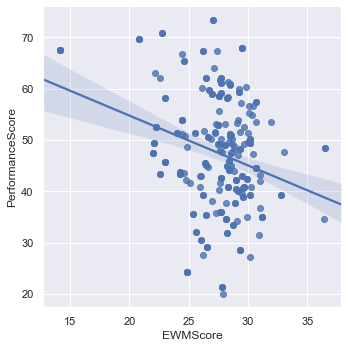

In [22]:
sns.lmplot(x = "EWMScore", y = "PerformanceScore", data = df_final)

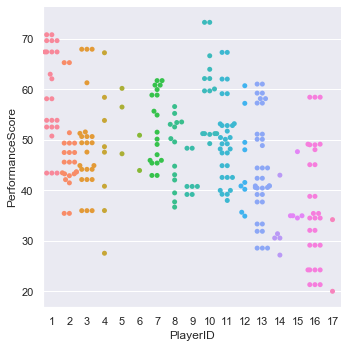

In [23]:
sns.catplot(x="PlayerID", y="PerformanceScore", data = df_final, kind = "swarm")

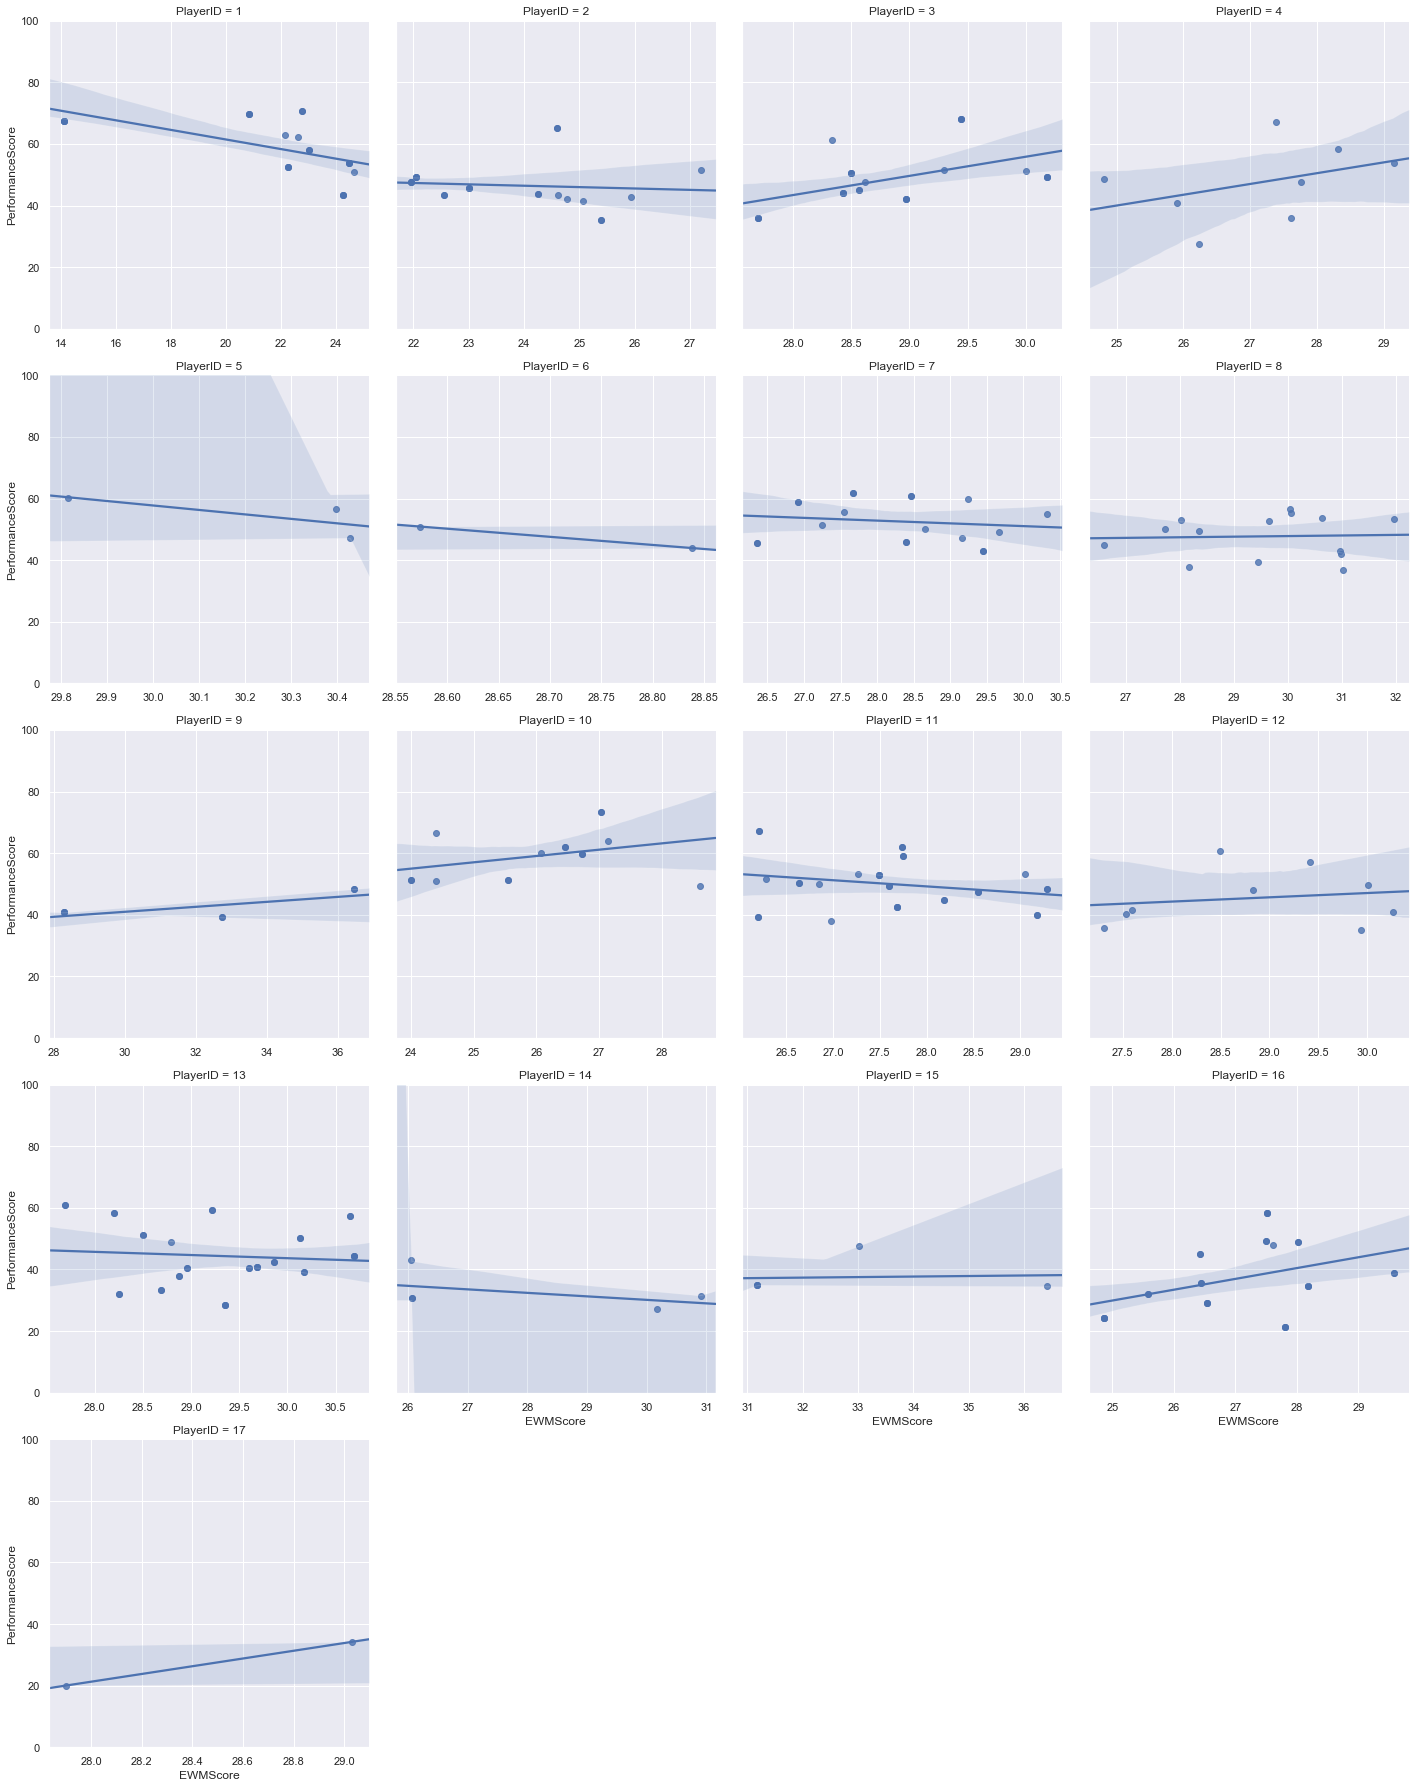

In [30]:
grid = sns.lmplot(x = "EWMScore", y = "PerformanceScore", col = "PlayerID", sharex=False, data = df_final, col_wrap=4)\
            .set(ylim=(0,100))

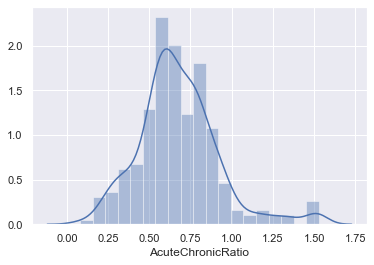

In [31]:
sns.distplot(df_final.AcuteChronicRatio)
plt.show()

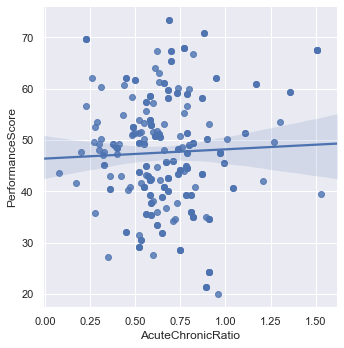

In [32]:
sns.lmplot(x = "AcuteChronicRatio", y = "PerformanceScore", data = df_final)

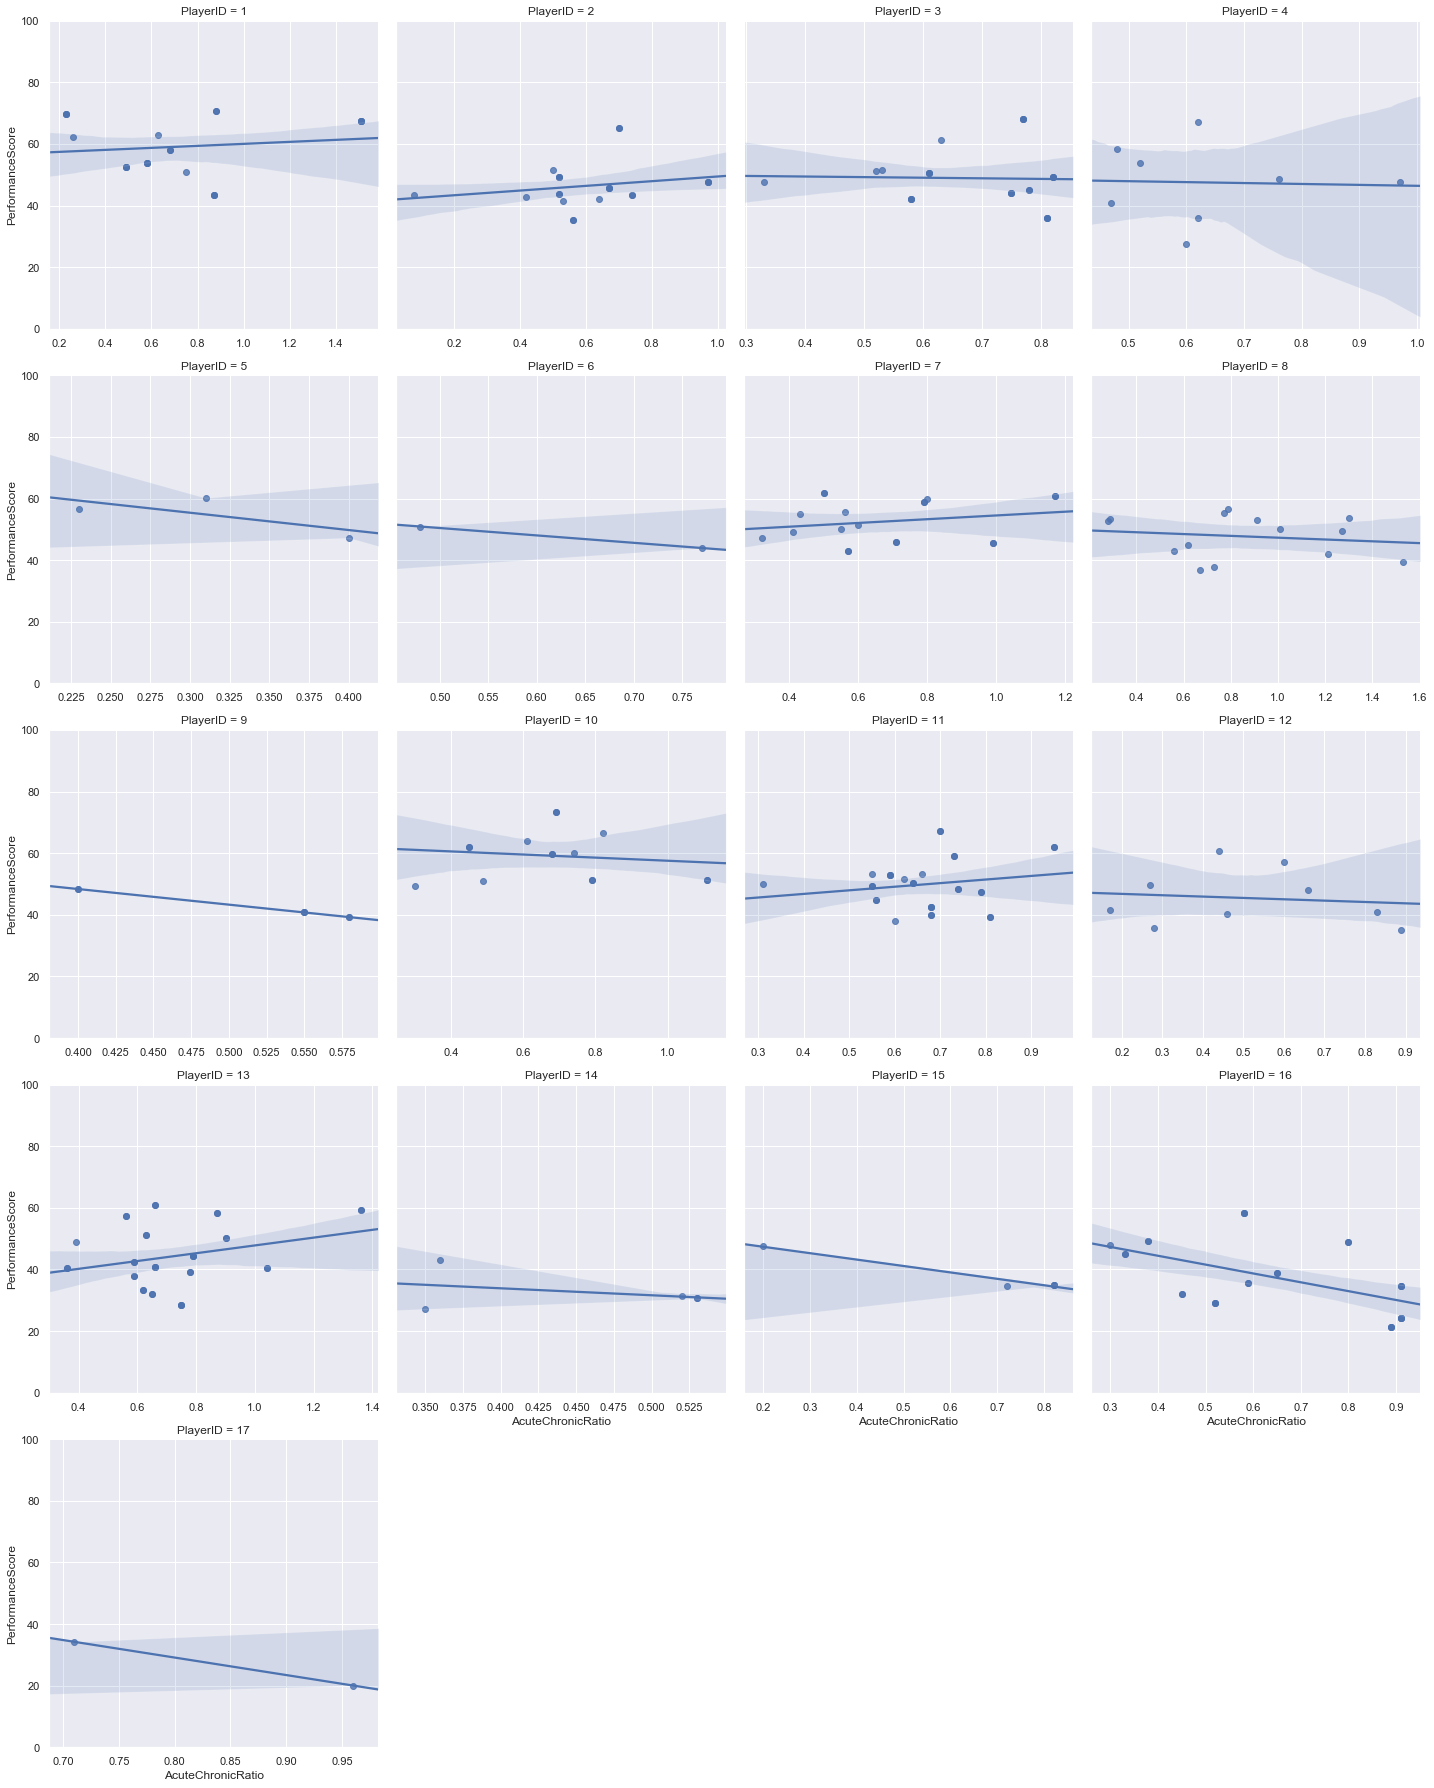

In [33]:
grid = sns.lmplot(x = "AcuteChronicRatio", y = "PerformanceScore", col = "PlayerID", sharex=False, data = df_final, col_wrap=4)\
            .set(ylim=(0,100))

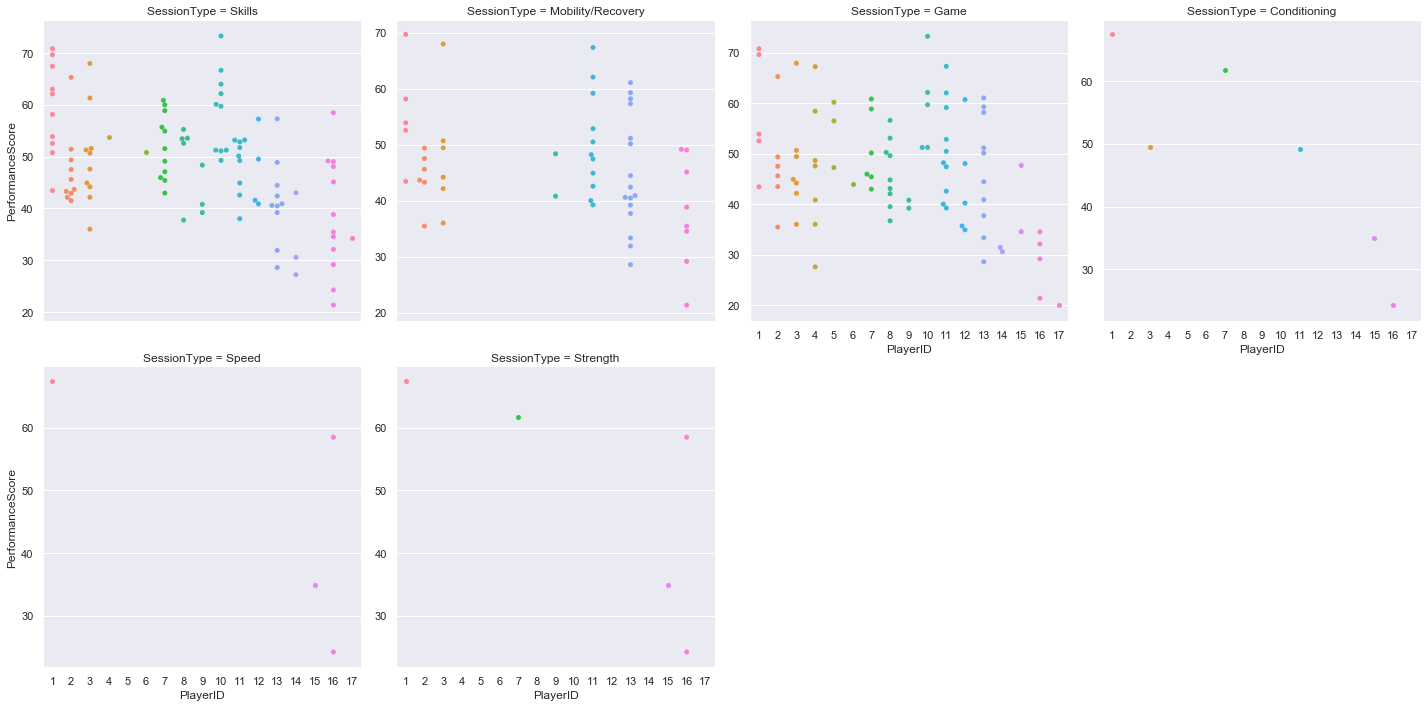

In [36]:
sns.catplot(x="PlayerID", y="PerformanceScore", col="SessionType", col_wrap=4, sharey=False, data=df_final, kind = "swarm")